# Travaux Pratiques de Modélisation Géologique et Géostatistique
O. Kaufmann - 2018 - 2020; O. Kaufmann & Q. Campeol, 2022-2023.
## Séance 6 : cokrigeage de teneurs en Pb et en Zn

***
## 1. Chargement des packages

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Chargez les libraires dont vous aurez besoin:       <br>
    - <b>sp</b>  <br>
    - <b>gstat</b>  <br>
    - <b>leaflet</b>  <br>
    - <b>raster</b>  
</div>

<b>Note:</b><br>    <b>Remarque: spTransform requiert rgdal</b>  <br>
    Il est possible que le package rgdal ne soit pas encore installé sur votre système d'exploitation et que l'installation ne se termine pas correctement. Dans ce cas, d'abord installer libproj-dev avec la commande <i>sudo apt-get install libproj-dev</i> 


In [1]:
# @info: Exécutez-moi pour activer les questions interactives
# -----------------------------------------------------------

from IPython.display import HTML
import codecs

# @hidden
HTML('''
<script>
code_show=true;
function code_toggle() {
 if (code_show){
  $('.cm-comment:contains(@hidden)').closest('div.input').hide();
 } else {
  $('.cm-comment:contains(@hidden)').closest('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<div># @info: Exécutez-moi pour activer les questions interactives </div>
''')

# @info: Exécutez-moi pour cacher le code, puis sauvegardez le notebook


In [2]:
%load_ext rpy2.ipython
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio as rio
import contextily as ctx
import rpy2

In [3]:
%%R
library(sp)
library(gstat)
library(raster)

***
## 2. Chargement et préparation du jeu de données <i>meuse_limited.txt</i>

### Jeu de données réduit, créé à partir du jeu de données <i>meuse</i> inclu dans le <i>package</i> <b>sp</b>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     <b>Jeu de données :</b><br>   <br>
    Nous nous intéresserons aux <b>teneurs en plomb</b> dans les sols d'une région des Pays-Bas en bordure de Meuse. Ce métal est un polluant qui peut avoir des effets sérieux sur la santé humaine. Il peut être inhalé sous forme de poussières ou ingéré lors de la consommation de végétaux qui ont poussé dans les sols contaminés. Les coordonnées sont exprimées dans le système 
</div>

<b>Note:</b><br>    <b>Contanimation des sols en plomb :</b><br>   <br>
    Selon le <i>Berlin Digital Environmental Atlas 2</i>, sur les parcelles présentant des concentrations supérieures à 600 mg/kg de matière sèche dans les sols, les céréales ne peuvent plus être cultivées pour la consommation humaine; entre 300 et 600 mg/kg les récoltes doivent être testées; au-dessus de 100 mg/kg la consommation de légumes-feuilles doit être évitée. Des niveaux inférieurs à 200 mg/kg sont requis sur les terrains de sport et dans les parcs où le sol nu peut être exposé. Les niveaux naturels de la plupart des sols sont de l'ordre de 30 mg/kg.


<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>2.1 Chargement du jeu de données</b>
</div>

- Chargez le jeu de données <i>meuse_limited</i> dans un DataFrame nommé <i>meuse</i>

In [ ]:
# Résultat attendu ci-dessous...

,x,y,cadmium,copper,lead,zinc,elev,dist,om,ffreq,soil,lime,landuse,dist.m
0,181072,333611,11.7,85,299,1022,7.909,0.001358,13.6,1,1,1,Ah,50
1,181298,333484,2.6,81,116,257,7.655,0.190094,8.0,1,2,0,Ga,270
2,181165,333370,3.2,31,132,346,8.217,0.190094,9.2,1,2,0,Ah,240
3,181232,333168,1.6,24,80,183,9.049,0.309702,6.3,1,2,0,W,420
4,180874,333339,11.2,93,285,1096,7.320,0.000000,15.4,1,1,1,W,20
5,180830,333246,9.5,86,240,1032,7.702,0.000000,16.2,1,1,1,W,10
6,180625,332847,8.7,69,207,735,7.020,0.000000,13.7,1,1,1,W,10
7,180704,332717,2.8,35,123,402,8.990,0.097514,7.2,1,1,1,Am,140
8,181147,332823,1.4,26,75,200,8.976,0.385804,6.9,1,2,0,W,490
9,180973,332687,1.3,24,67,180,8.743,0.320574,4.4,1,2,0,Ag,400


<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>2.2 Exploration et mise en forme du jeu de données</b>
</div>

- Examinez la distribution des variables concentrations en plomb et en zinc dans les sols

<div class="alert alert-block alert-warning">
<b>Question: </b><br>Peut-on faire l'hypothèse d'une distribution normale des concentrations en plomb et en Zinc ?
</div>

- Tracez l'histogramme des concentrations en plomb dans les sols

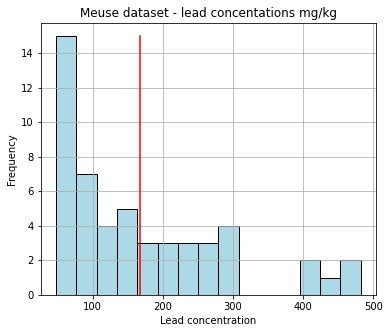

In [ ]:
# Résultat attendu ci-dessous...

- Tracez l'histogramme des concentrations en zinc dans les sols

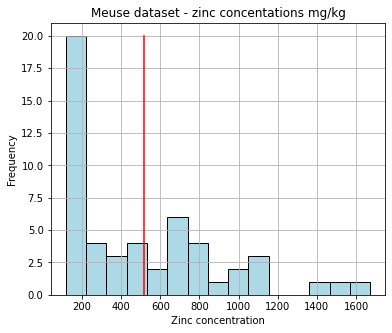

In [ ]:
# Résultat attendu ci-dessous...

In [ ]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a3c623e5175657374696f6e3a203c2f623e3c62723e436f6d6d656e742064c3a96372697269657a2d766f75732063657320646973747269627574696f6e73203f203c62723e0a202020205175656c6c65207472616e73666f726d6174696f6e206170706c697175657269657a2d766f7573207375722063657320646973747269627574696f6e7320706f757220717527656c6c65732073652072617070726f6368656e7420646520646973747269627574696f6e73206e6f726d616c6573203f20200a0a0a3c2f6469763e203c62723e0a3c627574746f6e20646174612d746f67676c653d22636f6c6c61707365220a2020202020202020202020202020202020202020646174612d7461726765743d22237175657374696f6e5f30303031223e4166666963686572206c612072c3a9706f6e73653c2f627574746f6e3e0a0a3c6469762069643d227175657374696f6e5f30303031220a2020202020202020202020202020202020202020636c6173733d22636f6c6c61707365223e202020204c6120646973747269627574696f6e20657374206173796dc3a97472697175652065742064c3a963616cc3a96520c3a020676175636865206465206c61206dc3a96469616e652c20657420646f6e63206176656320756e20c3a974616c656d656e7420646573206f62736572766174696f6e732076657273206c612064726f6974652e203c62723e0a20202020556e65207472616e73666f726d6174696f6e206c6f6761726974686d697175652e203c62723e0a3c2f6469763e0a'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour afficher la question interactive


- Calculez le logarithme des teneurs en Pb et en Zn et ajoutez-les au jeu de donnée réduit pour obtenir un histogramme plus symétrique

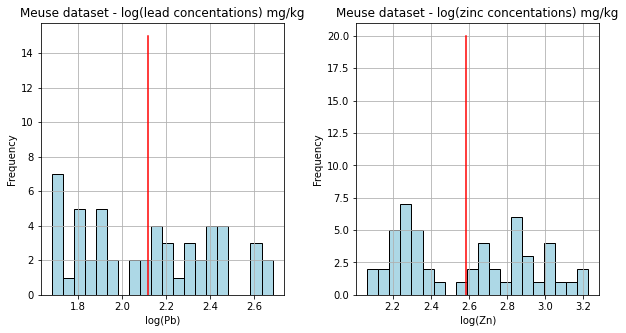

In [ ]:
# Résultat attendu ci-dessous...

- Envoyez le nouveau jeu de données dans l'espace de travail <code>R</code> avec <b>rpy2</b>

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>2.3 Définition du système de coordonnées</b>
</div>

- Définissez le système de coordonnées du jeu de données (EPSG:28992) et transformez ces coordonnées en WGS84 (EPSG:4326)

<div class="alert alert-block alert-info">
<b>Info:</b><br>     <b>Definir un système de coordonnées</b> <br><br>
    Pour définir un CRS, vous pouvez utiliser les fonctions <i>proj4string()</i> et <i>CRS()</i> du <b>package</b> <i>sp</i>. <br> <br>
    Pour appliquer une transformation entre deux CRS, vous pouvez utiliser la fonction <i>spTransform()</i> du <b>package</b> <i>sp</i>.
</div>

In [8]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303030223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030302220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e252552202d69206d657573653c62723e0a203c62723e0a3c62723e0a636f6f7264696e61746573286d6575736529203d207e782b793c62723e0a70726f6a34737472696e67286d6575736529203c2d2043525328272b696e69743d657073673a32383939322729200a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>2.4 Affichage du jeu de données sur un fond de carte</b>
</div>

- Avec contextily, affichez la carte des concentrations en Plomb

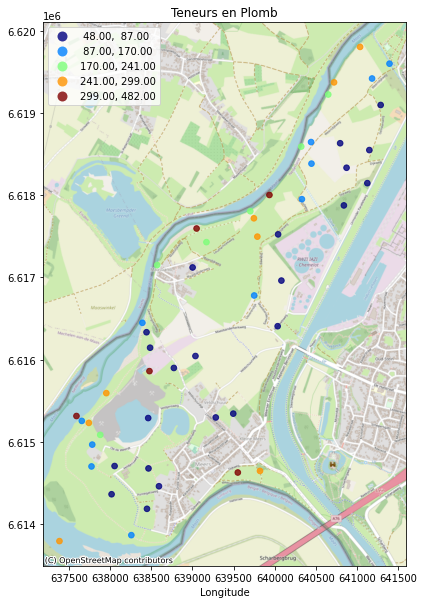

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>2.5 Intégration de la grille d'évaluation</b>
</div>

- Chargez la grille <i>meuse.grid</i> associée au jeu de donnée <i>meuse</i>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     <b>Pour mener des prédictions, il faut définir les endroits où l'on souhaite estimer les variables</b> <br>
<br>
    Cette grille servira à définir les endroits <b>x<sub>0</sub></b> où mener les estimations. Il existe une grille prédéfinie pour le jeu de données meuse. Elle se nomme meuse.grid et est également définie dans le système EPSG:28992.
</div>

In [10]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303031223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030312220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e2525523c62723e0a203c62723e0a3c62723e0a64617461286d657573652e67726964293c62723e0a636f6f7264696e61746573286d657573652e6772696429203c2d2063282778272c277927293c62723e0a70726f6a34737472696e67286d657573652e6772696429203c2d2043525328272b696e69743d657073673a323839393227290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


<div class="alert alert-block alert-warning">
<b>Remarque: Si l'on voulait reprojeter ensuite le jeu de donnée (ex. en WGS84), il faudrait définir la transformation comme suit:</b> 
<code>
df_WGS84 &lt;- spTransform(df, CRS('+init=epsg:4326'))
df &lt;- df_WGS84
df_WGS84.grid &lt;- spTransform(meuse.grid, CRS('+init=epsg:4326'))
df.grid &lt;- df_WGS84.grid
</code>
</div>

In [11]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303032223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030322220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e2525523c62723e0a20203c62723e0a3c62723e0a67726964646564286d657573652e6772696429203c2d20545255453c62723e0a73756d6d617279286d657573652e67726964290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


In [ ]:
# Résultat attendu ci-dessous...

Object of class SpatialPixelsDataFrame
Coordinates:
     min    max
x 178440 181560
y 329600 333760
Is projected: TRUE 
proj4string :
[+proj=sterea +lat_0=52.1561605555556 +lon_0=5.38763888888889
+k=0.9999079 +x_0=155000 +y_0=463000 +ellps=bessel +units=m +no_defs]
Number of points: 3103
Grid attributes:
  cellcentre.offset cellsize cells.dim
x            178460       40        78
y            329620       40       104
Data attributes:
     part.a           part.b            dist        soil     ffreq   
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   1:1665   1: 779  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.1193   2:1084   2:1335  
 Median :0.0000   Median :1.0000   Median :0.2715   3: 354   3: 989  
 Mean   :0.3986   Mean   :0.6014   Mean   :0.2971                    
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.4402                    
 Max.   :1.0000   Max.   :1.0000   Max.   :0.9926                    


- Affichez les distances à la meuse stockées dans la grille

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Vous pouvez utiliser les fonctions suivantes: <br> <br>
    - <code>image</code><br>  <br>
    - <code>spplot</code><br>
</div>

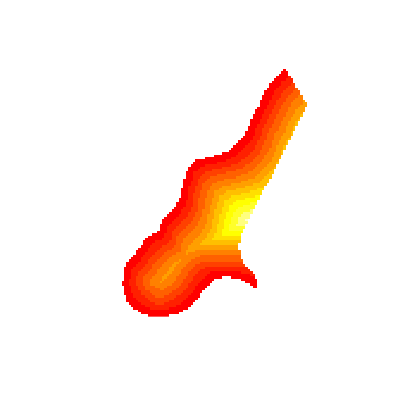

In [ ]:
# Résultat attendu ci-dessous...

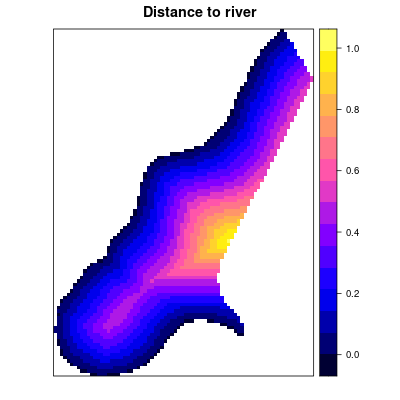

In [ ]:
# Résultat attendu ci-dessous...

***
## 3. Géostatistique univariée : résoudre les équations du krigeage et afficher les résultats sur la grille

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>3.1 Préparation de l'affichage des résultats</b>
</div>

- Ecrivez une fonction **plot_krige_results** pour afficher les résultats (prédiction et variance des erreurs d'estimation) sous forme de carte en y superposant les points d'échantillonnage sur un fond de carte géographique avec contextily, utilisez une image géoréférencée multi-bandes pour stocker les prédictions et la variance sur les prédictions.

In [14]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303033223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030332220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e64656620706c6f745f6b726967655f726573756c747328696d6167655f66696c652c206764662c202a2a6b7761726773293a3c62723e0a202020206669672c206178203d20706c742e737562706c6f74732866696773697a653d2832302c3130292c206e636f6c733d32293c62723e0a20202020636d617073203d206b77617267732e706f702827636d617073272c205b27687376272c2027686f74275d293c62723e0a2020202061785f7469746c6573203d206b77617267732e706f7028277469746c6573272c205b2770726564696374696f6e73272c202776617269616e6365275d293c62723e0a202020206669675f7469746c65203d206b77617267732e706f7028276669675f7469746c65272c202727293c62723e0a2020202064617461203d205b4e6f6e652c204e6f6e655d3c62723e0a20202020696d203d205b4e6f6e652c204e6f6e655d3c62723e0a20202020666f72206920696e2072616e67652832293a3c62723e0a202020202020202061785b695d2e7365745f7469746c652861785f7469746c65735b695d293c62723e0a20202020202020206764662e706c6f742861783d61785b695d2c206d61726b65723d2778272c20636f6c6f723d276772657927293c62723e0a20202020202020206374782e6164645f626173656d61702861783d61785b695d2c20736f757263653d6374782e70726f7669646572732e4f70656e5374726565744d61702e43482c206372733d22657073673a323839393222293c62723e0a20202020776974682072696f2e6f70656e28696d6167655f66696c652c2027722729206173206f75743a3c62723e0a20202020202020207370617469616c5f657874656e74203d205b6f75742e626f756e64732e6c6566742c206f75742e626f756e64732e72696768742c206f75742e626f756e64732e626f74746f6d2c206f75742e626f756e64732e746f705d3c62723e0a2020202020202020666f72206920696e2072616e67652832293a3c62723e0a202020202020202020202020646174615b695d203d206f75742e7265616428692b312c206d61736b65643d54727565293c62723e0a20202020666f72206920696e2072616e67652832293a3c62723e0a2020202020202020696d5b695d203d2061785b695d2e696d73686f7728646174615b695d2c20636d61703d636d6170735b695d2c20657874656e743d7370617469616c5f657874656e742c202a2a6b7761726773293c62723e0a20202020202020206669672e636f6c6f7262617228696d5b695d2c2061783d61785b695d2920203c62723e0a202020206966206669675f7469746c65213d27273a3c62723e0a2020202020202020706c742e73617665666967286669675f7469746c652b272e706e672729202020203c62723e0a20202020202020206669672e7375707469746c65286669675f7469746c652c20666f6e7473697a653d3230290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>3.2 Krigeage ordinaire du Pb</b>
</div>

- Ajustez un modèle variographique

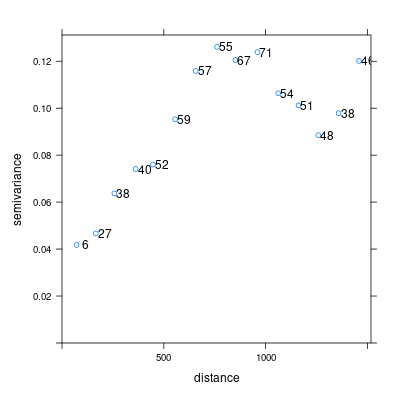

In [ ]:
# Résultat attendu ci-dessous...

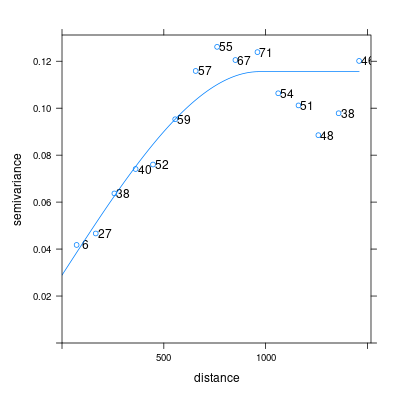

In [ ]:
# Résultat attendu ci-dessous...

- Menez l'estimation de la teneur à l'aide du krigeage ordinaire sur la grille 

In [ ]:
# Résultat attendu ci-dessous...

[using ordinary kriging]


- Affichez les résultats sous forme de cartes

In [18]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303034223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030342220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e252552202d6f20696d6167655f66696c653c62723e0a203c62723e0a3c62723e0a696d6167655f66696c65203c2d20272e2f6d657573655f70625f6f6b2e746966273c62723e0a6d5f70625f6f6b203c2d20737461636b286173286d657573652e70625f6f6b5b27766172312e70726564275d2c20225261737465724c6179657222292c206173286d657573652e70625f6f6b5b27766172312e766172275d2c20225261737465724c617965722229293c62723e0a7772697465526173746572286d5f70625f6f6b2c20696d6167655f66696c652c206f76657277726974653d54525545290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


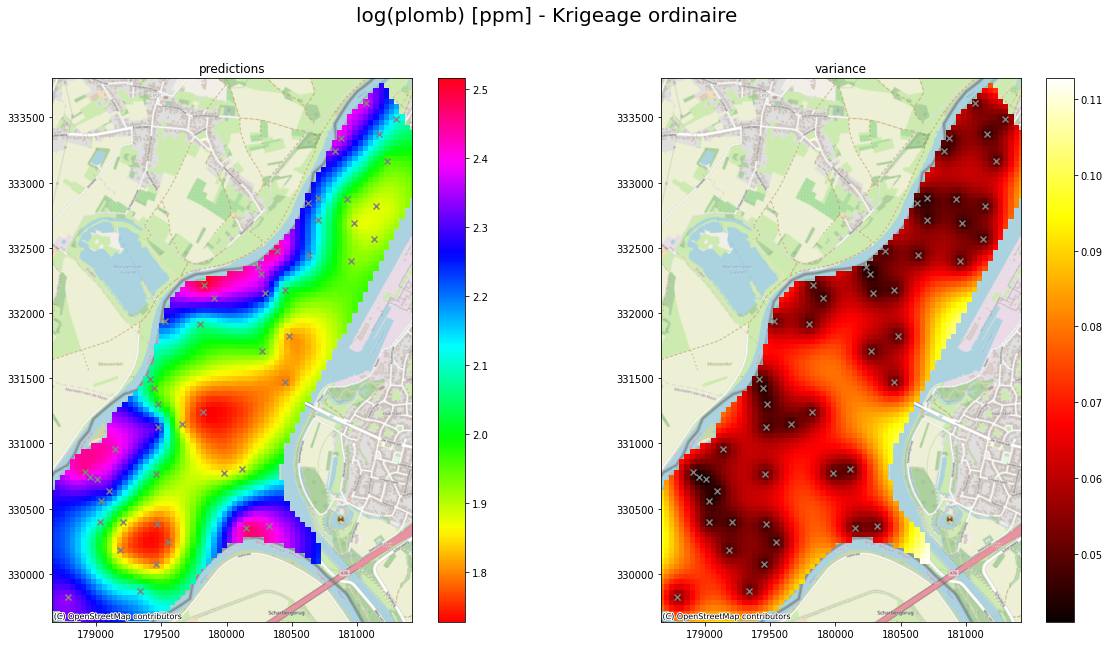

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>3.3 Krigeage ordinaire du Zn</b>
</div>

- Ajustez un modèle variographique

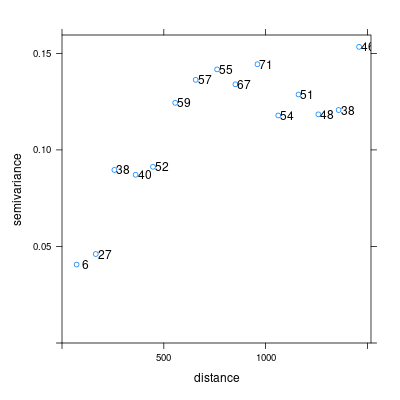

In [ ]:
# Résultat attendu ci-dessous...

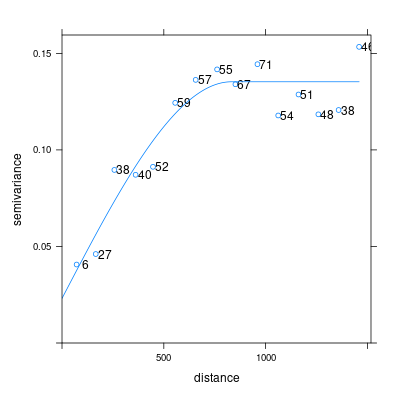

In [ ]:
# Résultat attendu ci-dessous...

- Menez l'estimation de la teneur à l'aide du krigeage ordinaire sur la grille 

In [ ]:
# Résultat attendu ci-dessous...

[using ordinary kriging]


- Affichez les résultats sous forme de cartes

/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/colors.py:1254: RuntimeWarning: overflow encountered in true_divide
  resdat /= (vmax - vmin)
/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


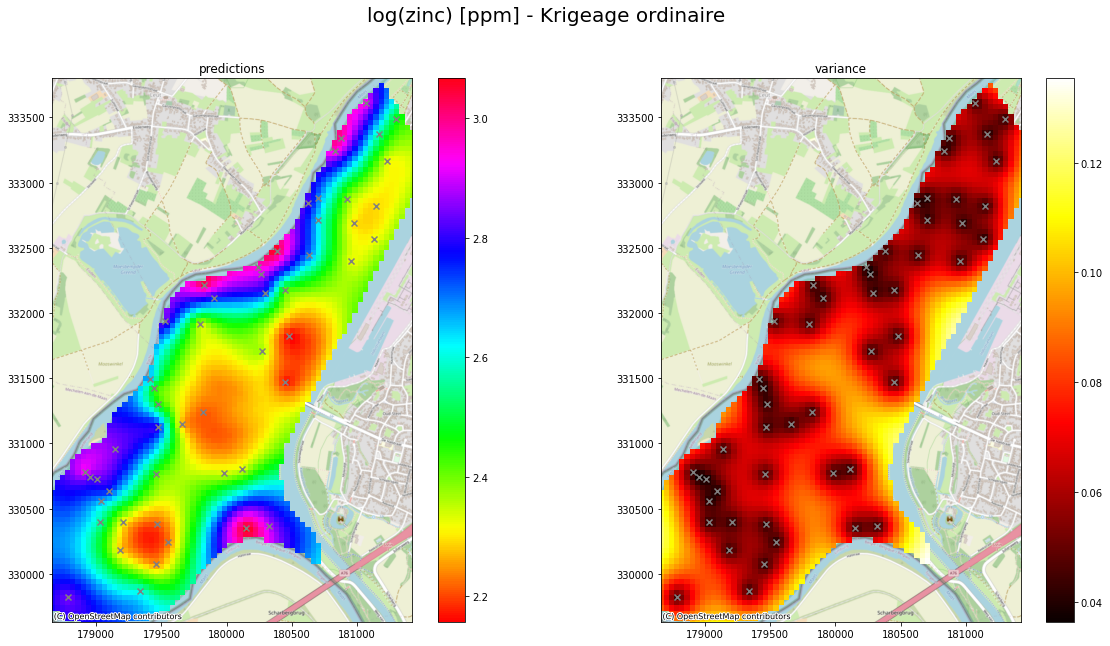

In [ ]:
# Résultat attendu ci-dessous...

***
## 4. Géostatistique multivariée : résoudre les équations du co-krigeage du Pb et du Zn et afficher les résultats sur la grille

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>4.1 Construire le modèle linéaire de co-régionalisation</b>
</div>

- Calculez le variogramme expérimental pour le jeu de données robena et affichez-le

In [25]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303035223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030352220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e2525523c62723e0a20203c62723e0a3c62723e0a67325f657870203c2d206773746174284e554c4c2c206964203d20226c6f675f7062222c20666f726d203d206c6f675f7062207e20312c2064617461203d206d65757365293c62723e0a67325f657870203c2d2067737461742867325f6578702c206964203d20226c6f675f7a6e222c20666f726d203d206c6f675f7a6e207e20312c2064617461203d206d65757365293c62723e0a762e63726f7373203c2d20766172696f6772616d2867325f657870293c62723e0a706c6f7428762e63726f73732c20706c3d54290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


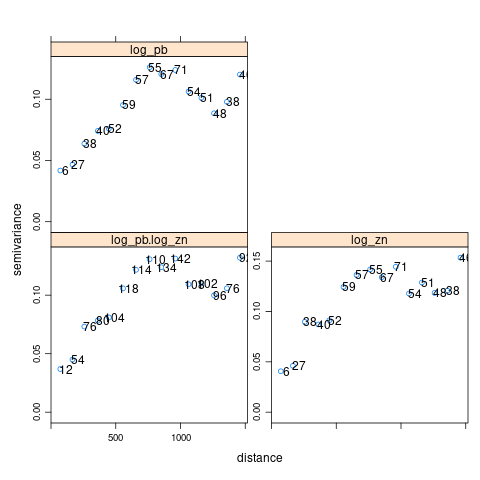

In [ ]:
# Résultat attendu ci-dessous...

- Ajustez un modèle linéaire de co-régionalisation au variogramme expérimental à l'aide de la fonction <code>fit.lmc</code>

In [26]:
%%R
?fit.lmc

File: /tmp/Rtmpac2q5u/Rtxt81376d41e722
fit.lmc                 package:gstat                  R Documentation



_F_i_t _a _L_i_n_e_a_r _M_o_d_e_l _o_f _C_o_r_e_g_i_o_n_a_l_i_z_a_t_i_o_n _t_o _a _M_u_l_t_i_v_a_r_i_a_b_l_e _S_a_m_p_l_e

_V_a_r_i_o_g_r_a_m



_D_e_s_c_r_i_p_t_i_o_n:



     Fit a Linear Model of Coregionalization to a Multivariable Sample

     Variogram; in case of a single variogram model (i.e., no nugget)

     this is equivalent to Intrinsic Correlation



_U_s_a_g_e:



     fit.lmc(v, g, model, fit.ranges = FALSE, fit.lmc = !fit.ranges, 

     correct.diagonal = 1.0, ...) 

     

_A_r_g_u_m_e_n_t_s:



       v: multivariable sample variogram, output of variogram



       g: gstat object, output of gstat



   model: variogram model, output of vgm; if supplied this value is

          used as initial value for each fit



fit.ranges: logical; determines whether the range coe

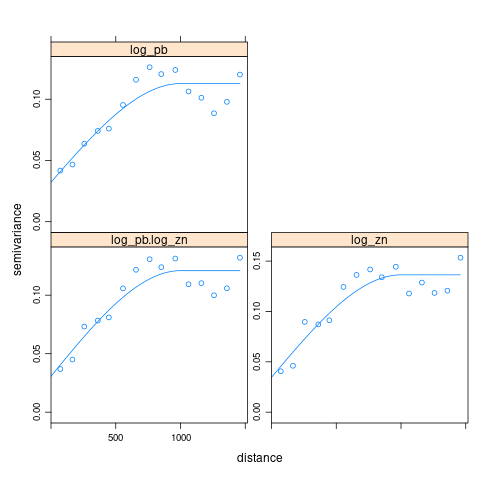

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-ir-64x64.png" width="24"/>	<b>4.2 Co-krigeage des teneurs en Pb et en Zn </b>
</div>

- Réalisez le co-krigeage à l'aide de la fonction <code>predict</code> et affichez le résumé des résultats

In [28]:
%%R
?predict

Help on topic ‘predict’ was found in the following packages:

  Package               Library
  gstat                 /home/q/R/x86_64-pc-linux-gnu-library/4.1
  stats                 /usr/lib/R/library
  raster                /home/q/R/x86_64-pc-linux-gnu-library/4.1
  terra                 /home/q/R/x86_64-pc-linux-gnu-library/4.1

File: /tmp/Rtmpac2q5u/Rtxt81375ae1590a
predict                 package:gstat                  R Documentation



Multivariable Geostatistical Prediction and Simulation



Description:



     The function provides the following prediction methods: simple,

     ordinary, and universal kriging, simple, ordinary, and universal

     cokriging, point- or block-kriging, and conditional simulation

     equivalents for each of the kriging methods.



Usage:



     ## S3 method for class 'gstat'

     predict(object, newdata, block = numeric(0), nsim = 0, 

             indicators = FALSE, BLUE = FALSE, debug.level = 1, mask, 

             na.action = na.pass,

In [ ]:
# Résultat attendu ci-dessous...

Linear Model of Coregionalization found. Good.
[using ordinary cokriging]
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.04373 0.05685 0.06390 0.06641 0.07405 0.10953 


###### Affichez les résultats sous forme de cartes :

- Carte des logs des teneurs en <b>plomb</b> et de la variance d'estimation

In [30]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303036223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030362220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e252552202d6f20696d6167655f66696c653c62723e0a203c62723e0a3c62723e0a696d6167655f66696c65203c2d20272e2f6d657573655f70625f636f6b722e746966273c62723e0a6d5f70625f636f6b72203c2d20737461636b28617328636f6b726967656167655b276c6f675f70622e70726564275d2c20225261737465724c6179657222292c20617328636f6b726967656167655b276c6f675f70622e766172275d2c20225261737465724c617965722229293c62723e0a7772697465526173746572286d5f70625f636f6b722c20696d6167655f66696c652c206f76657277726974653d54525545290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


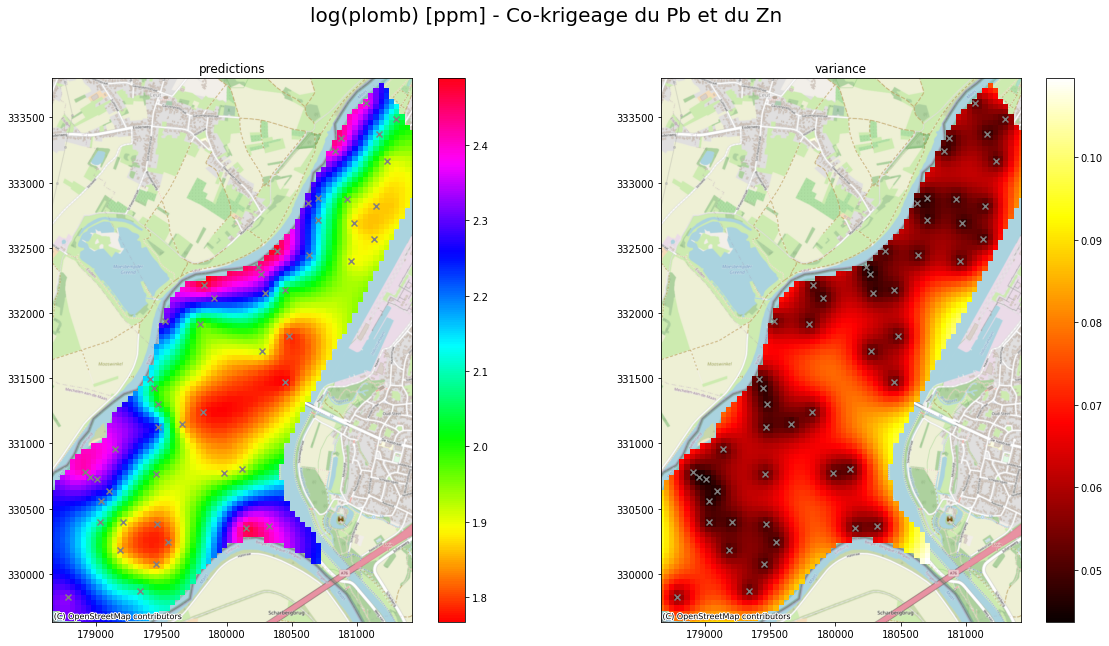

In [ ]:
# Résultat attendu ci-dessous...

- Carte des logs des teneurs en <b>zinc</b> et de la variance d'estimation

/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/colors.py:1254: RuntimeWarning: overflow encountered in true_divide
  resdat /= (vmax - vmin)
/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


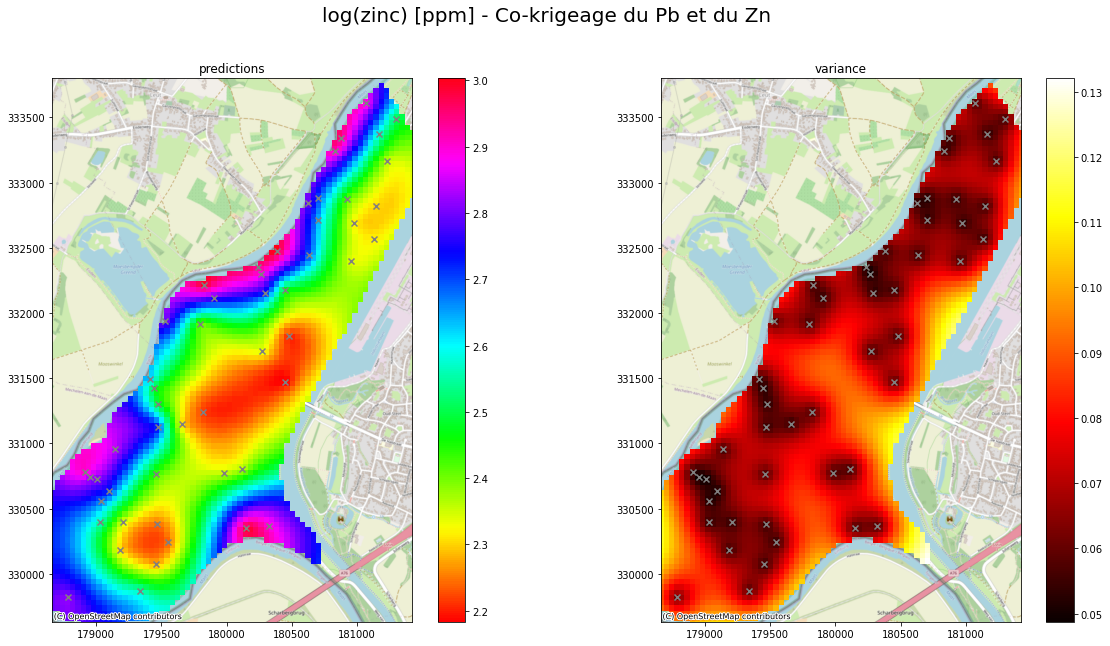

In [ ]:
# Résultat attendu ci-dessous...

<div class="alert alert-block alert-success">
	<img align="right" src="./Image_file/logo-Python3-64x64.png" width="24"/>	<b>4.3 Comparaison entre le krigeage ordinaire et le co-krigeage</b>
</div>

- Calculez la différence entre le krigeage ordinaire du plomb et son co-krigeage et sauvegardez les résultats sous forme d'une image géoréférencée multi-bandes

In [34]:
# @hidden
sx=b'3c64697620636c6173733d22616c65727420616c6572742d626c6f636b20616c6572742d7761726e696e67223e0a09536920766f757320c3aa74726520626c6f7175c3a92865292c0a2020202020202020202020202020202020202020616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f75732e3c62723e0a095665696c6c657a20c3a0203c623e636f6d7072656e6472653c2f623e206c6120736f6c7574696f6e0a2020202020202020202020202020202020202020657420c3a0206c61207465737465722070617220766f75732d6dc3aa6d652e0a3c2f6469763e203c62723e0a0a3c627574746f6e20646174612d746f67676c653d22636f6c6c617073652220646174612d7461726765743d222372657665616c5f30303037223e0a20202020202020202020202020202020202020204166666963686572206c6520636f64653c2f627574746f6e3e0a3c6469762069643d2272657665616c5f303030372220636c6173733d22636f6c6c61707365223e0a3c62723e3c636f64653e252552202d6f20696d6167655f66696c653c62723e0a203c62723e0a3c62723e0a636f6b7269676561676524646966662e70726564203c2d206d657573652e70625f6f6b24766172312e70726564202d20636f6b72696765616765246c6f675f70622e707265643c62723e0a636f6b7269676561676524646966662e766172203c2d206d657573652e70625f6f6b24766172312e766172202d20636f6b72696765616765246c6f675f70622e7661723c62723e0a3c62723e0a696d6167655f66696c65203c2d20272e2f6d5f636f6b725f6f6b5f646966662e746966273c62723e0a6d5f636f6b725f6f6b5f64696666203c2d20737461636b28617328636f6b726967656167655b27646966662e70726564275d2c20225261737465724c6179657222292c20617328636f6b726967656167655b27646966662e766172275d2c20225261737465724c617965722229293c62723e0a7772697465526173746572286d5f636f6b725f6f6b5f646966662c20696d6167655f66696c652c206f76657277726974653d54525545290a3c2f636f64653e0a3c2f6469763e0a0a2020202020202020202020202020202020202020'
HTML(codecs.decode(codecs.decode(sx,'hex'), 'utf8'))

# @info: Exécutez-moi pour accéder à l'aide interactive


- Affichez les résultats avec la fonction python <b>plot_krige_results</b>

/home/q/.local/share/virtualenvs/ModGeo-1d7LMbOH/lib/python3.8/site-packages/matplotlib/image.py:487: RuntimeWarning: overflow encountered in true_divide
  A_scaled /= ((a_max - a_min) / frac)


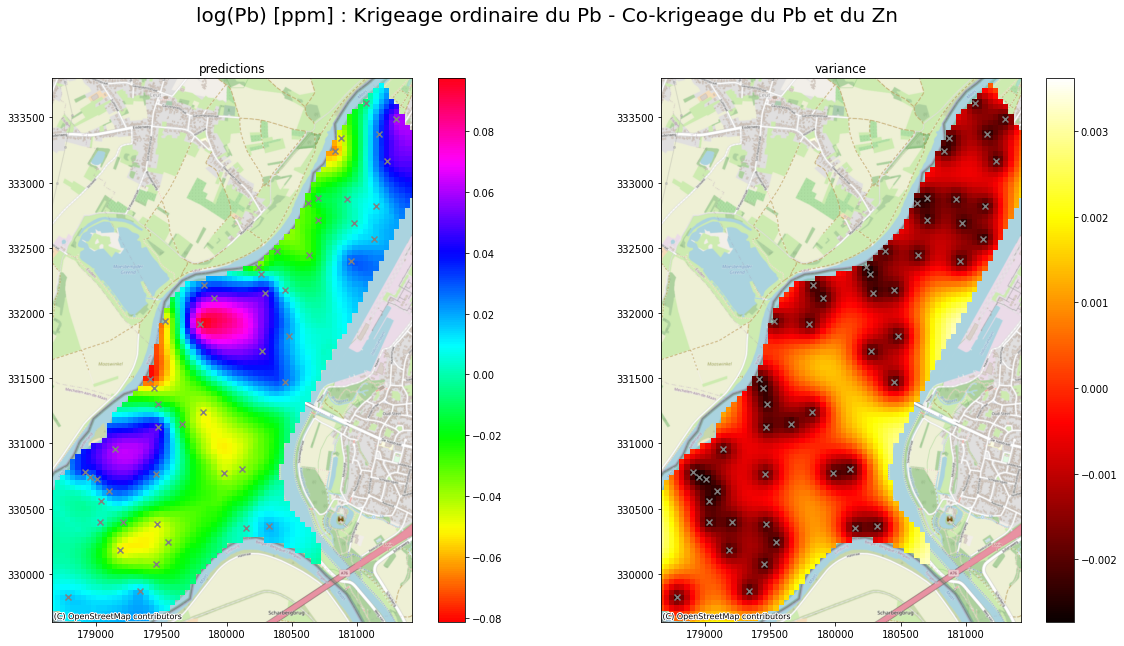

In [ ]:
# Résultat attendu ci-dessous...

***
<div class="alert alert-block alert-danger" align="center">
    <b>FIN DE LA SIXIEME SEANCE</b>
</div>